## Snakes and Ladders

*1. Model the game of Snakes and Ladders (single-player game) as a Markov Process. Write out it’s state space and structure of transition probabilities.*

There are 100 numbers on the board (from 1 to 100). We start outside the board and we can call this state 0. The game ends when we reach 100. (If the current state plus the dice we roll go beyond 100, we will bounce back.) So without considering snakes and ladders, the state space is {0,1,2,...,100} with **starting state 0 and terminal state 100**. However, if we reach the start of a snake or ladder, we can never stay there, we have to either go up or down. So the start of snakes or ladders cannot be a part of the states. **Thus we can consider the state space as {0,1,2,...,100} \ {start of snakes or ladders}.**

Everytime, we roll a dice to decide which state to go to, and the next state only depends on current state, which satisfies **Markov property**. Any non-terminal state can go to 6 states with equal probability. **So the transition probabilities for non-terminal states are 1/6 to each of the 6 next states.**

In [39]:
from dataclasses import dataclass
from typing import Mapping, Dict
from rl.distribution import Categorical, Constant
from rl.markov_process import Transition, FiniteMarkovProcess
import numpy as np
import matplotlib.pyplot as plt


In [40]:
@dataclass
class SnakeLaddersFMP(FiniteMarkovProcess[int]):
    def __init__(self, snake_ladder):
        self.snake_ladder: Dict[int,int] = snake_ladder
        self.transition_matrix = self.get_transmat()
        super().__init__(self.get_transition_map())
    def get_transmat(self):
        mat = np.zeros((101,101))
        for i in range(100):
            for j in range(1,7):
                if (i+j)>100:
                    next_state = 100-(i+j-100)
                    if next_state in self.snake_ladder:
                        mat[i][self.snake_ladder[next_state]]+=1/6
                    else:
                        mat[i][next_state]+=1/6
                elif (i+j) in self.snake_ladder:
                    mat[i][self.snake_ladder[i+j]]+=1/6
                else:
                    mat[i][i+j]+=1/6
        
        return mat
    
    def get_transition_map(self)-> Transition[int]:
        tran_map: Dict[int,Categorical[int]]={}
        for i in range(100):
            if i in self.snake_ladder.keys():
                continue
            tm: Mapping[int, float]={
                j:self.transition_matrix[i][j] for j in range(101)
            }
            tran_map[i] = Categorical(tm)
        tran_map[100] = None
        return tran_map
                       

In [41]:
#example from piazza
snake_ladder1 = {38:1,3:39,31:6,7:48,49:8,12:51,65:14,53:17,20:41,25:57,
                 28:35,70:34,76:37,94:42,45:74,88:50,98:54,60:85,82:63,
                 67:90,69:92,77:83}
test1=SnakeLaddersFMP(snake_ladder1)
mat1 = test1.get_transmat()
mat1[95]
mat2 = test1.get_transition_map()
mat2[95]

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.16666666666666669, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.16666666666666669, 97: 0.16666666666666669, 98: 0.0, 99: 0.33333333333333337, 100: 0.16666666666666669}

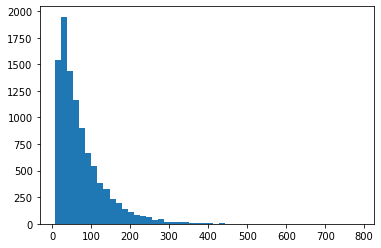

In [46]:
time_steps=[]
iter = 0
for sim in test1.traces(Constant(0)):
    time_step = 0
    for i in sim:
        time_step+=1
    time_steps.append(time_step)
    iter+=1
    if iter>=10000:
        break
_=plt.hist(x=time_steps,bins=50)
    